Google Search Analysis Project

Phase 1 : Web Scraping

In [1]:
pip install selenium beautifulsoup4

   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.4 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.4 MB 4.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.4 MB 3.9 MB/s eta 0:00:02
   ------------- -------------------------- 3.1/9.4 MB 4.3 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.4 MB 4.5 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.4 MB 4.5 MB/s eta 0:00:02
   ------------------- -------------------- 4.5/9.4 MB 3.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.2/9.4 MB 3.3 MB/s eta 0:00:02
   -------------------------- ------------- 6.3/9.4 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 6.8/9.4 MB 3.5 MB/s eta 0:00:01
   --------------------------------- ------ 7.9/9.4 MB 3.6 MB/s eta 0:00:01
   ----------------------------------- ---- 8.4/9.4 MB 3.7 MB/s eta 0:00:01
   ----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 1.0.2 requires urllib3<2.0.0,>=1.25.8, but you have urllib3 2.4.0 which is incompatible.
requests 2.28.2 requires urllib3<1.27,>=1.21.1, but you have urllib3 2.4.0 which is incompatible.


In [15]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--start-maximized")  # optional: improves rendering
# options.add_argument("--headless")  # only if needed

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

def google_search(query):
    url = f"https://www.google.com/search?q={query.replace(' ', '+')}"
    driver.get(url)
    time.sleep(3)

    # Check page title
    print("PAGE TITLE:", driver.title)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Try multiple selectors
    result_blocks = soup.select('div.tF2Cxc')
    if not result_blocks:
        result_blocks = soup.select('div.g')

    print(f"Found {len(result_blocks)} results")

    results = []
    for block in result_blocks:
        title_tag = block.select_one('h3')
        link_tag = block.select_one('a')
        snippet_tag = block.select_one('.VwiC3b') or block.select_one('span.aCOpRe')

        if title_tag and link_tag:
            results.append({
                'title': title_tag.get_text(strip=True),
                'url': link_tag['href'],
                'snippet': snippet_tag.get_text(strip=True) if snippet_tag else ""
            })

    return pd.DataFrame(results)

df = google_search("best python course 2024")
print(df.head())
driver.quit()


PAGE TITLE: best python course 2024 - Google Search
Found 12 results
                                               title   
0  Best Python tutorial for beginners in 2024? : ...  \
1   Best Python Courses & Certificates Online [2025]   
2  10 Best Online Courses for Learning Python in ...   
3  Is Learning Python Still Worth It In 2024? | P...   
4   Python Courses & Certifications Online - Shiksha   

                                                 url   
0  https://www.reddit.com/r/learnpython/comments/...  \
1      https://www.coursera.org/courses?query=python   
2  https://pesto.tech/resources/top-10-online-cou...   
3  https://www.youtube.com/watch?v=7xkYfq2OBL4&pp...   
4  https://www.shiksha.com/online-courses/python-...   

                                             snippet  
0  This coursehttps://www.py4e.com/lessonsis one ...  
1  In summary, here are 10 of our most popular py...  
2                                                     
3                                    

In [16]:
df.to_csv("search_results_python_course.csv", index=False)


Phase 2 : Data Enrichment

In [17]:
pip install trafilatura

   ---------------------------------------- 0.0/10.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/10.2 MB 5.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/10.2 MB 4.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/10.2 MB 4.2 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/10.2 MB 4.2 MB/s eta 0:00:02
   ----------------- ---------------------- 4.5/10.2 MB 4.1 MB/s eta 0:00:02
   -------------------- ------------------- 5.2/10.2 MB 4.1 MB/s eta 0:00:02
   ------------------------ --------------- 6.3/10.2 MB 4.1 MB/s eta 0:00:01
   --------------------------- ------------ 7.1/10.2 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 7.9/10.2 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.7/10.2 MB 4.0 MB/s eta 0:00:01
   ------------------------------------- -- 9.4/10.2 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 10.2/10.2 MB 3.9 MB/s eta 0:00:00
   --

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.28.2 requires urllib3<1.27,>=1.21.1, but you have urllib3 2.4.0 which is incompatible.


In [34]:
#final 
import time
import pandas as pd
from bs4 import BeautifulSoup
import trafilatura
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

# SETUP CHROMEDRIVER
options = Options()
options.add_argument("--start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")
# You can uncomment the below line to hide the browser window (headless mode)
# options.add_argument("--headless")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)


# LOAD YOUR PHASE 1 DATA 
df = pd.read_csv("search_results_python_course.csv")  # Replace with your filename

# If you're testing, you can limit to 5 URLs
# df = df.head(5)

# SCRAPING FUNCTION 
def extract_page_info_with_selenium(url):
    try:
        driver.get(url)
        time.sleep(3)  # wait for the page to load

        soup = BeautifulSoup(driver.page_source, 'html.parser')

        title = soup.title.string if soup.title else ""
        h1 = soup.find('h1').get_text(strip=True) if soup.find('h1') else ""

        meta_desc = soup.find("meta", attrs={"name": "description"})
        description = meta_desc["content"] if meta_desc else ""

        # Extract full article or visible content
        full_text = trafilatura.extract(driver.page_source)

        return {
            "page_title": title,
            "h1": h1,
            "meta_description": description,
            "main_text": full_text[:500] if full_text else ""
        }

    except Exception as e:
        print(f"Error fetching {url[:50]}...: {e}")
        return {
            "page_title": "", "h1": "", "meta_description": "", "main_text": ""
        }


# SCRAPE ALL URLs
enriched_data = []

for index, row in df.iterrows():
    print(f"Scraping {index + 1}/{len(df)}: {row['url']}")
    page_info = extract_page_info_with_selenium(row['url'])

    enriched_data.append({
        "search_title": row.get('title', ''),
        "search_url": row.get('url', ''),
        "search_snippet": row.get('snippet', ''),
        **page_info
    })

# CREATE AND SAVE DATAFRAME
df_enriched = pd.DataFrame(enriched_data)
df_enriched.to_csv("google_search_enriched1.csv", index=False)
print("✅ Data saved to google_search_enriched.csv")

#  Close the driver 
driver.quit()


Scraping 1/12: https://www.reddit.com/r/learnpython/comments/1ajlvog/best_python_tutorial_for_beginners_in_2024/
Scraping 2/12: https://www.coursera.org/courses?query=python
Scraping 3/12: https://pesto.tech/resources/top-10-online-courses-for-learning-python-in-2024
Scraping 4/12: https://www.youtube.com/watch?v=7xkYfq2OBL4&pp=0gcJCdgAo7VqN5tD
Scraping 5/12: https://www.shiksha.com/online-courses/python-courses-certification-training-st619-tg21
Scraping 6/12: https://brainstation.io/career-guides/how-to-become-a-python-developer
Scraping 7/12: https://www.udemy.com/topic/python/?srsltid=AfmBOorp4Pc7RoLs1yI13ZGFNuyMIj0eJT0WTb8QSKVJ24DNPuxY7VSW
Scraping 8/12: https://pesto.tech/resources/top-10-online-courses-for-learning-python-in-2024
Scraping 9/12: https://www.geeksforgeeks.org/best-python-courses/
Scraping 10/12: https://developers.google.com/edu/python
Error fetching https://developers.google.com/edu/python...: HTTPConnectionPool(host='localhost', port=52276): Read timed out. (read

In [36]:
driver.quit()

Phase 3 : NLP analysis

In [38]:
#1 keyword extraction using tf-idf

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

df1 = pd.read_csv("google_search_enriched1.csv")
texts = df1['main_text'].fillna("")

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.85,
    min_df=1,
    ngram_range=(1, 2)
)

tfidf_matrix = vectorizer.fit_transform(texts)
feature_names = vectorizer.get_feature_names_out()

def extract_top_keywords(row_index, top_n=5):
    row = tfidf_matrix[row_index].toarray().flatten()
    top_indices = row.argsort()[-top_n:][::-1]
    return [feature_names[i] for i in top_indices]

df1['top_keywords'] = [extract_top_keywords(i) for i in range(len(df))]

df1.to_csv("google_search_with_keywords.csv", index=False)
print("✅ Keywords extracted and file saved.")


✅ Keywords extracted and file saved.


In [42]:
#2 Sentiment analysis

In [53]:
from textblob import TextBlob

df1['main_text'] = df1['main_text'].fillna("")

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Value between -1 (negative) and +1 (positive)

df1['sentiment_score'] = df1['main_text'].apply(analyze_sentiment)

def categorize_sentiment(score):
    if score > 0.2:
        return 'Positive'
    elif score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df1['sentiment_label'] = df1['sentiment_score'].apply(categorize_sentiment)

print(df1[['search_title', 'sentiment_score', 'sentiment_label']].head())

df1.to_csv("google_search_with_sentiment.csv", index=False)
print("✅ File saved as 'google_search_with_sentiment.csv'")


                                        search_title  sentiment_score   
0  Best Python tutorial for beginners in 2024? : ...         0.157292  \
1   Best Python Courses & Certificates Online [2025]         0.700000   
2  10 Best Online Courses for Learning Python in ...         0.455195   
3  Is Learning Python Still Worth It In 2024? | P...         0.000000   
4   Python Courses & Certifications Online - Shiksha         0.337143   

  sentiment_label  
0         Neutral  
1        Positive  
2        Positive  
3         Neutral  
4        Positive  
✅ File saved as 'google_search_with_sentiment.csv'


In [45]:
#3 Topic clustring

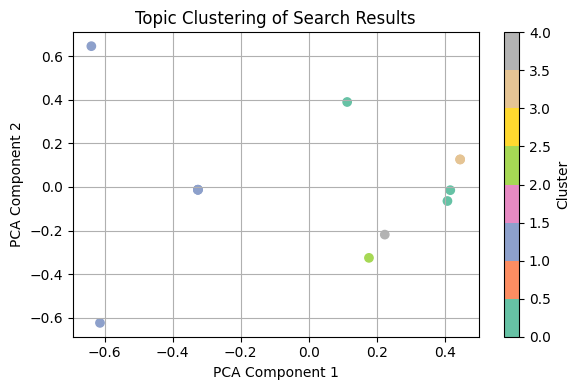

✅ File saved as 'google_search_with_sentiment.csv'


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

df1['main_text'] = df1['main_text'].fillna("")

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=2)
tfidf_matrix = vectorizer.fit_transform(df1['main_text'])

num_clusters = 5  # You can increase this number to get more refined topics
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df1['topic_cluster'] = kmeans.fit_predict(tfidf_matrix)

pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(6, 4))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df1['topic_cluster'], cmap='Set2')
plt.title("Topic Clustering of Search Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

df1.to_csv("google_search_with_topic_clustring.csv", index=False)
print("✅ File saved as 'google_search_with_sentiment.csv'")

In [48]:
#Show top keywords in each cluster
def get_top_keywords(model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    keywords = {}
    for i, cluster_center in enumerate(model.cluster_centers_):
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        keywords[i] = [terms[ind] for ind in top_indices]
    return keywords

top_keywords = get_top_keywords(kmeans, vectorizer, n_terms=10)

# Print keywords per cluster
for cluster, keywords in top_keywords.items():
    print(f"\n🔹 Cluster {cluster}:")
    print(", ".join(keywords))



🔹 Cluster 0:
python, learning, beginners, learn, general, courses, need, analysis, applications, automation

🔹 Cluster 1:
waiting, computer, begin, course, ideal, goals, general, explore, exercises, everybody

🔹 Cluster 2:
programming, python, data, course, package, skills, computer, goals, best, used

🔹 Cluster 3:
python, everybody, programming, learning, introduction, includes, levels, ideal, explore, exercises

🔹 Cluster 4:
best, python, courses, package, certifications, begin, covering, need, blog, 10


In [49]:
#4 Source analysis

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\1309154852.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette='Blues_d')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\1309154852.py:26: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


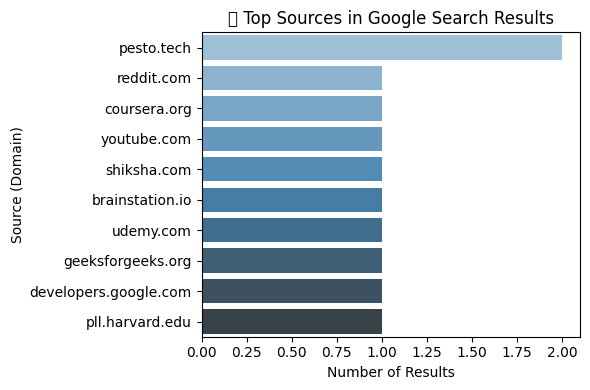

In [86]:
import pandas as pd
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.read_csv("search_results_python_course.csv")
#Extract domain (source) from URL
def extract_source(url):
    try:
        netloc = urlparse(url).netloc
        return netloc.replace("www.", "")
    except:
        return "unknown"

df2['url'] = df2['url'].apply(extract_source)

#Count top sources
top_sources = df2['url'].value_counts().head(10)

#Plot top sources
plt.figure(figsize=(6, 4))
sns.barplot(x=top_sources.values, y=top_sources.index, palette='Blues_d')
plt.title('🔗 Top Sources in Google Search Results')
plt.xlabel('Number of Results')
plt.ylabel('Source (Domain)')
plt.tight_layout()
plt.show()




In [ ]:
df1.to_csv("google_search_enriched_final.csv", index=False)
print("✅ File saved as 'google_search_enriched_final.csv'")

In [58]:
#adding a source column

In [65]:
df3 = df3.rename(columns={'search_url': 'url'})
print(df3.head())

                                        search_title               url   
0  Best Python tutorial for beginners in 2024? : ...    www.reddit.com  \
1   Best Python Courses & Certificates Online [2025]  www.coursera.org   
2  10 Best Online Courses for Learning Python in ...        pesto.tech   
3  Is Learning Python Still Worth It In 2024? | P...   www.youtube.com   
4   Python Courses & Certifications Online - Shiksha   www.shiksha.com   

                                      search_snippet   
0  This coursehttps://www.py4e.com/lessonsis one ...  \
1  In summary, here are 10 of our most popular py...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          page_title   
0  Best Python tutorial for beginners in 2024? : ...  \
1  Best Python Courses & Certificates Online [202...   
2  10 Best Online Courses for Learning Python in .

In [69]:
from urllib.parse import urlparse

def extract_source(url):
    try:
        netloc = urlparse(url).netloc
        return netloc.replace("www.", "")
    except:
        return "unknown"

df3['source'] = df3['url'].apply(extract_source)
df3.to_csv("google_search_enriched_final.csv", index=False)


In [88]:
df3.to_csv("google_search_enriched_final.csv", index=False)

In [90]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
